In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math


In [49]:
df=pd.read_csv('hw3.csv')
df['ts']=pd.to_datetime(df['ts'])


## Removing Duplicates

In [50]:
print(f'Number of Duplicated Rows: {df.duplicated().sum()}')

Number of Duplicated Rows: 307


In [51]:
df.drop_duplicates(inplace=True)

## Fixing Tokens

In [52]:
token_map=dict()
for token in df.token.unique():
    if token[0]=='<':
        continue
    else:
        token_map[f'<span name="tokenName">{token}</span>']=token
df['token'].replace(token_map,inplace=True)

## Replacing Missing Values with average of High and Low

In [53]:
df.loc[df['close'].isnull(), 'close'] = 0.5 * (df.loc[df['close'].isnull(), 'high'] + df.loc[df['close'].isnull(), 'low'])


In [54]:
print('Open NAs: ',df.open.isna().sum())

Open NAs:  0


## Replacing Outliers with average of High and Low

In [56]:
df.loc[((df['open']*2<df['close']) |((df['open']*0.1>df['close'] ))), 'close']= 0.5 * (df.loc[df['close'].isnull(), 'high'] + df.loc[df['close'].isnull(), 'low'])

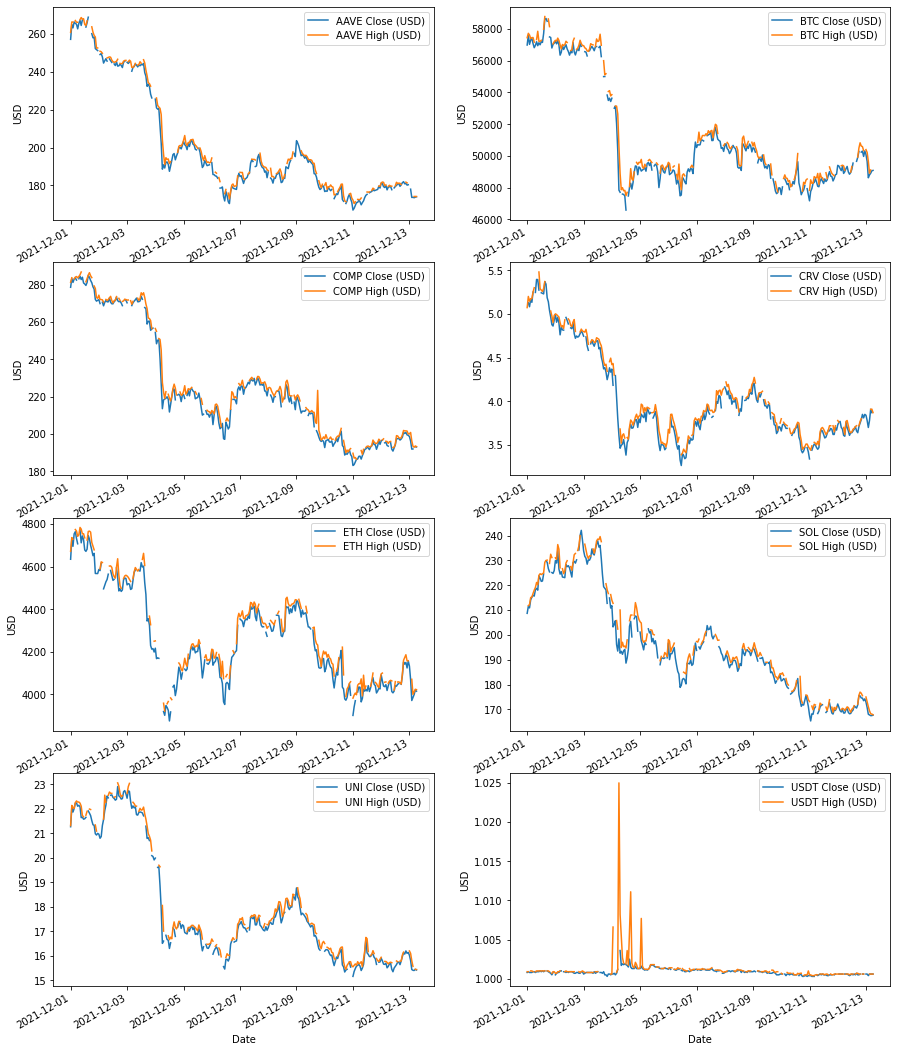

In [12]:
tokens_in_df = df.token.unique()
fig, axes = plt.subplots(nrows=math.ceil(tokens_in_df.size / 2), ncols=2, figsize=(15, 5 * math.ceil(tokens_in_df.size / 2)))

idx = 0
for label, df_token in df.groupby('token'):
    df_token.plot(ax=axes[idx//2,idx%2],x='ts',y=['close','high'],label=[f'{label} Close (USD)',f'{label} High (USD)'],xlabel='Date',ylabel='USD')
    idx+=1


## Replacing Remaning Missing Values through Linear Interpolation

In [57]:
df_interpolate=df.set_index('ts')

In [58]:
for token in set(df.token):
    df_interpolate.loc[df_interpolate['token']==token,'close']=df_interpolate.loc[df_interpolate['token']==token,'close'].interpolate(method='time')

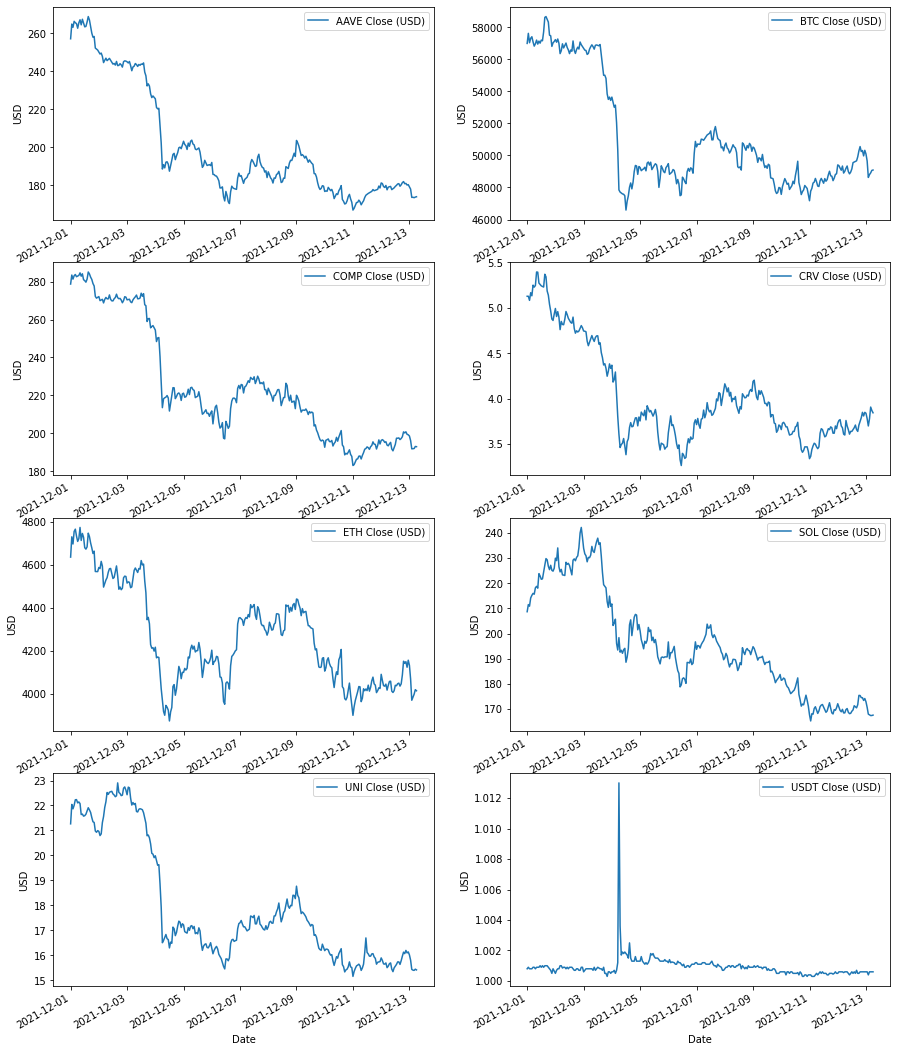

In [59]:
tokens_in_df = df.token.unique()
fig, axes = plt.subplots(nrows=math.ceil(tokens_in_df.size / 2), ncols=2, figsize=(15, 5 * math.ceil(tokens_in_df.size / 2)))

idx = 0
for label, df_token in df_interpolate.groupby('token'):
    df_token.plot(ax=axes[idx//2,idx%2],y=['close'],label=[f'{label} Close (USD)'],xlabel='Date',ylabel='USD')
    idx+=1

In [60]:
df_interpolate['volumeUSD']=df_interpolate['volume']*df_interpolate['close']

In [61]:
df_pivot=df_interpolate.pivot_table(index='ts', columns='chain',values='volumeUSD')
df_pivot

chain,BTC,ETH,SOL,USDT
ts,,,,
2021-12-01 00:00:00,2.213880e+07,6.126982e+06,1.461392e+07,1.589673e+06
2021-12-01 01:00:00,3.455784e+07,1.461288e+07,1.958693e+07,3.432608e+06
2021-12-01 02:00:00,3.374441e+07,7.524512e+06,1.048605e+07,2.138060e+06
2021-12-01 03:00:00,4.026204e+07,1.038233e+07,1.507604e+07,2.976554e+06
2021-12-01 04:00:00,4.934400e+07,1.243420e+07,1.231740e+07,4.974485e+06
...,...,...,...,...
2021-12-13 02:00:00,4.520130e+07,1.531003e+07,1.462383e+07,7.136713e+06
2021-12-13 03:00:00,2.564013e+07,6.652874e+06,8.103022e+06,4.340487e+06
2021-12-13 04:00:00,1.490360e+07,4.389996e+06,7.760250e+06,2.930650e+06


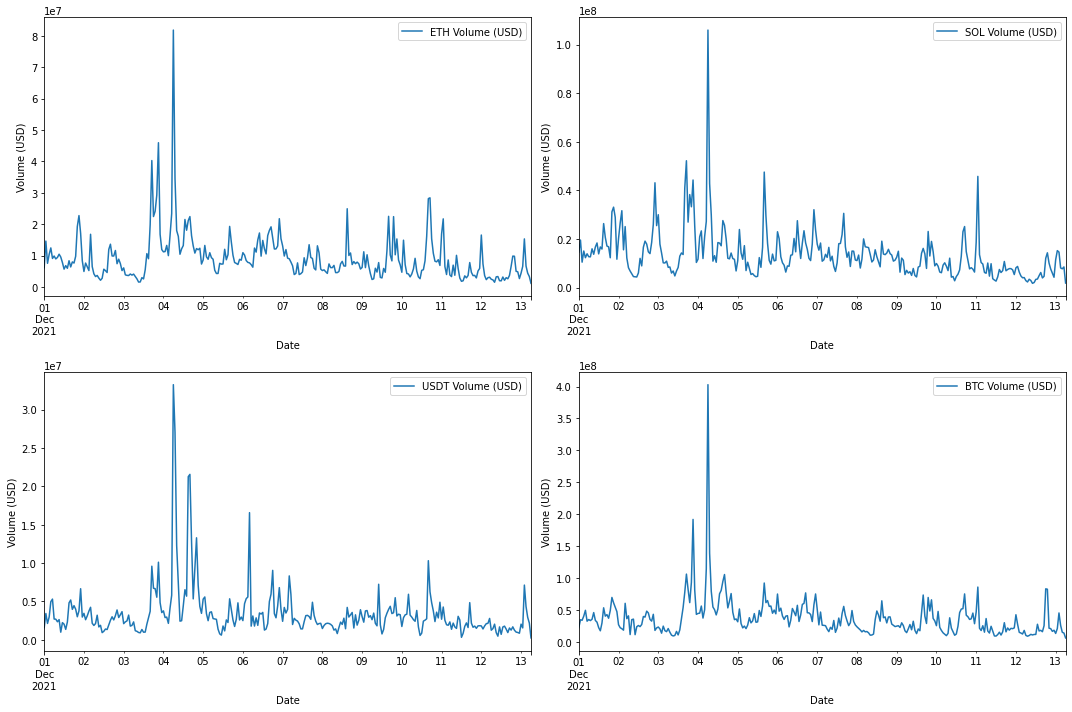

In [62]:
chain_in_df = df.chain.unique()
fig, axes = plt.subplots(nrows=math.ceil(chain_in_df.size / 2), ncols=2, figsize=(15, 5 * math.ceil(chain_in_df.size / 2)))

idx = 0
for chain in chain_in_df:
    df_pivot.plot(ax=axes[idx//2,idx%2],y=[chain],label=[f'{chain} Volume (USD)'],xlabel='Date',ylabel='Volume (USD)')
    idx+=1
plt.tight_layout()

<AxesSubplot:xlabel='Date', ylabel='Volume (USD)'>

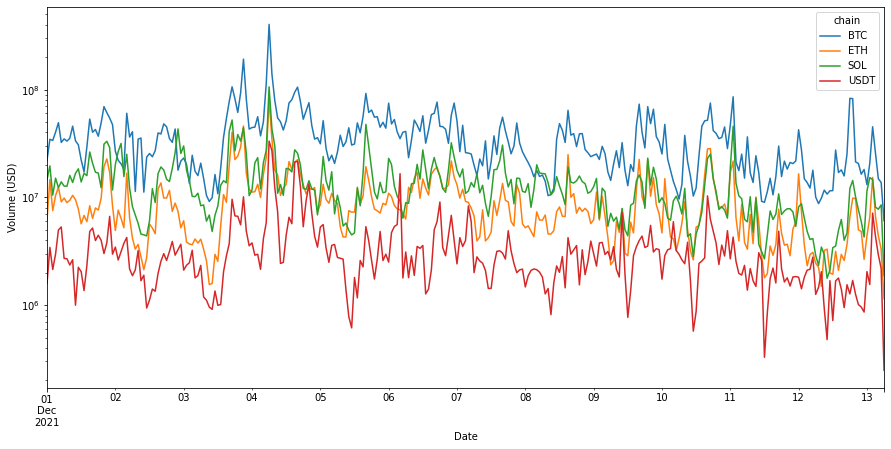

In [63]:
df_pivot.plot(logy=True,figsize=(15,7),xlabel='Date',ylabel='Volume (USD)')